In [29]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et


In [3]:
proj=gpd.read_file('../shp/combi.shp')

In [4]:
proj.head()

,id,geometry
0,1,"POLYGON ((-10423170.940 5164494.710, -10425171..."


In [5]:
proj=proj.set_crs(epsg=4326)
print(proj)

   id                                           geometry
0   1  POLYGON ((-10423170.940 5164494.710, -10425171...


In [6]:
import shapely
from shapely.geometry import Point
from shapely.geometry import shape 
from shapely.geometry import Polygon


In [7]:
proj.total_bounds

array([-10425171.94,   5164494.71, -10423170.94,   5166495.71])

In [8]:
proj.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
proj.bounds

,minx,miny,maxx,maxy
0,-10425171.94,5164494.71,-10423170.94,5166495.71


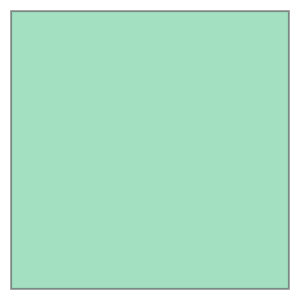

In [10]:
proj.loc[0, 'geometry']

In [11]:
proj.plot()

ValueError: 'box_aspect' and 'fig_aspect' must be positive

ValueError: 'box_aspect' and 'fig_aspect' must be positive

<Figure size 432x288 with 1 Axes>

In [45]:
long=proj.iloc[0].geometry.centroid.x

In [46]:
lat=proj.iloc[0].geometry.centroid.y

In [14]:
proj.total_bounds

array([-10425171.94,   5164494.71, -10423170.94,   5166495.71])

In [21]:
h=proj['geometry'].apply(lambda x: list(x.exterior.coords))

In [22]:
h

0    [(-10423170.94, 5164494.71), (-10425171.94, 51...
Name: geometry, dtype: object

In [23]:
from glob import glob
sape=glob('../shp/combi.shp')

In [25]:
sape.sort()

In [27]:
sapefiles=[]
for i in sape:
    usagdf=(gpd.GeoDataFrame.from_file(i))

In [29]:
usagdf.shape

(1, 2)

In [32]:
usagdf.area

0    4004001.0
dtype: float64

In [4]:
import tifffile as tf
import matplotlib.pyplot as plt
import rasterio
import earthpy.plot as ep


In [2]:
tfile=rasterio.open('../tif/iowaclassified.tif')

In [9]:
with rasterio.open('../tif/iowaclassified.tif') as dem_src:
    dtm_pre_arr=dem_src.read(1)

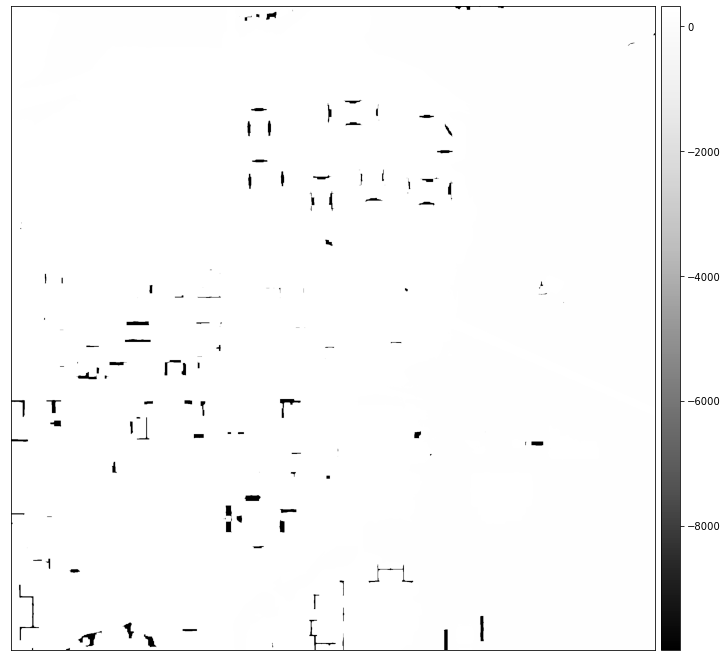

<AxesSubplot:>

In [10]:
ep.plot_bands(dtm_pre_arr)

In [11]:
print("the minimum raster value is: ", dtm_pre_arr.min())
print("the maximum raster value is: ", dtm_pre_arr.max())

the minimum raster value is:  -9999.0
the maximum raster value is:  317.69000000000005


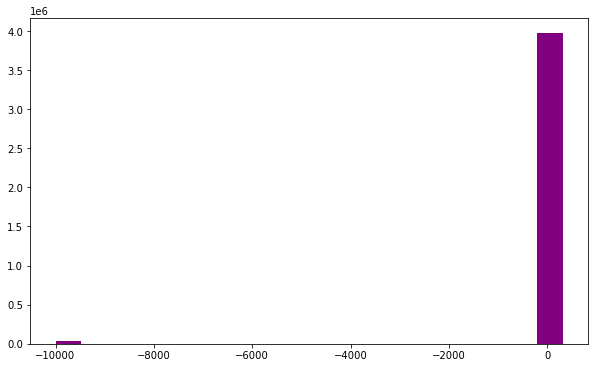

In [12]:
ep.hist(dtm_pre_arr,
        figsize=(10, 6))
plt.show()

In [15]:
# Read in your data and mask the no data values
with rasterio.open('../tif/iowaclassified.tif') as dem_src:
    # Masked=True will mask all no data values
    dtm_pre_arr = dem_src.read(1, masked=True)

In [16]:
print("the minimum raster value is: ", dtm_pre_arr.min())
print("the maximum raster value is: ", dtm_pre_arr.max())

the minimum raster value is:  269.65999999999997
the maximum raster value is:  317.69000000000005


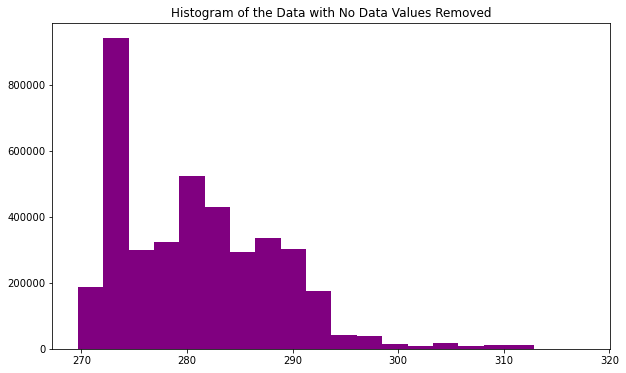

In [17]:
# A histogram can also be helpful to look at the range of values in your data
ep.hist(dtm_pre_arr,
        figsize=(10, 6),
        title="Histogram of the Data with No Data Values Removed")
plt.show()

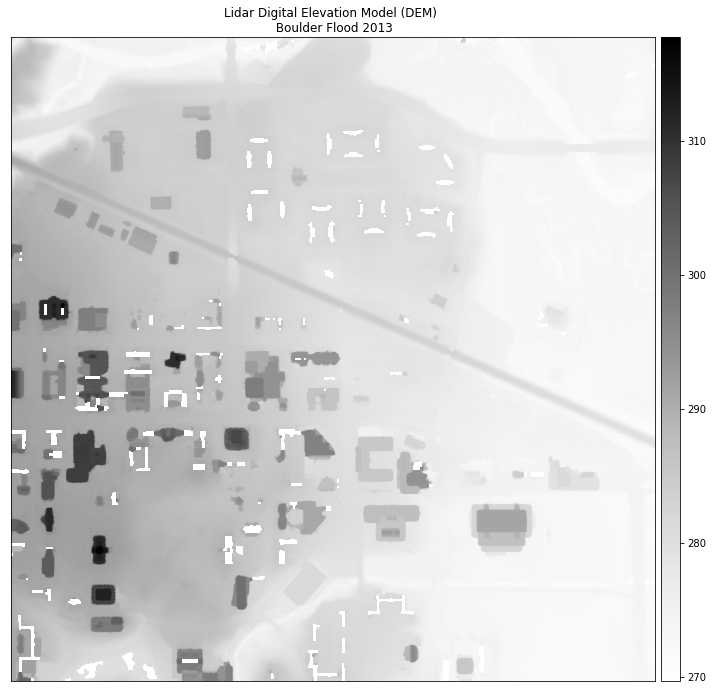

In [18]:
# Plot data using earthpy
ep.plot_bands(dtm_pre_arr,
              title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013",
              cmap="Greys")

plt.show()

In [19]:
with rasterio.open('../tif/iowaclassified.tif') as dem_src:
    lidar_dem_im = dem_src.read(1, masked=True)

print("Numpy Array Shape:", lidar_dem_im.shape)
print("Object type:", type(lidar_dem_im))

Numpy Array Shape: (2001, 2001)
Object type: <class 'numpy.ma.core.MaskedArray'>


In [55]:
h=tfile.read(1)

In [56]:
h[row,col]

293.6809975659178

In [57]:
h

array([[280.238096  , 280.08831959, 279.96367151, ..., 275.01149812,
        275.01025712, 275.00792566],
       [280.22790713, 280.08208588, 279.9674635 , ..., 274.94438152,
        274.95      , 275.02006348],
       [280.2272736 , 280.10966415, 279.99438865, ..., 274.96635271,
        274.95      , 275.0364463 ],
       ...,
       [291.38      , 291.38      , 291.38      , ..., 271.54130961,
        271.47773415, 271.45      ],
       [291.38      , 291.38      , 291.38      , ..., 271.57393538,
        271.51973289, 271.50663718],
       [291.38      , 291.38      , 291.38      , ..., 271.58478585,
        271.55      , 271.55      ]])

In [58]:
import numpy as np
from scipy.interpolate import griddata

In [62]:
lo=h[:,0]
la=h[:,1]

pts=1000

In [64]:
[x,y]=np.meshgrid(np.linspace(np.min(lo),np.max(la),np.sqrt(pts)),np.linspace(np.min(lo),np.max(la),np.sqrt(pts)));
z = griddata((Long, Lat), Elev, (x, y), method='linear');
x = np.matrix.flatten(x); #Gridded longitude
y = np.matrix.flatten(y); #Gridded latitude
z = np.matrix.flatten(z); #Gridded elevation

TypeError: 'numpy.float64' object cannot be interpreted as an integer

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

DriverError: Failed to read GeoJSON data

/tmp/ipykernel_19887/3913217777.py:3: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


DriverError: Failed to read GeoJSON data

In [26]:
import pandas as pd
h=pd.read_csv('../geojson/iowa2.csv')

In [27]:
h

,Classification,EdgeOfFlightLine,GpsTime,Intensity,NumberOfReturns,OriginId,PointSourceId,ReturnNumber,ScanAngleRank,ScanDirectionFlag,UserData,X,Y,Z
0,2.0,0.0,55112.731,68.0,1.0,17583.0,79.0,1.0,0.0,1.0,70.0,-10423180.01,5165777.62,272.70
1,2.0,0.0,55112.731,42.0,2.0,17583.0,79.0,2.0,1.0,1.0,70.0,-10423175.18,5165778.53,272.80
2,2.0,0.0,55112.731,58.0,2.0,17583.0,79.0,2.0,1.0,1.0,70.0,-10423172.82,5165779.01,273.10
3,2.0,0.0,55112.744,48.0,2.0,17583.0,79.0,2.0,0.0,0.0,70.0,-10423177.63,5165779.27,272.70
4,2.0,0.0,55112.744,71.0,2.0,17583.0,79.0,2.0,0.0,0.0,70.0,-10423180.02,5165778.81,272.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430525,2.0,0.0,56177.165,50.0,2.0,17583.0,85.0,2.0,-11.0,1.0,69.0,-10424370.00,5164717.33,278.40
1430526,2.0,0.0,56177.165,53.0,2.0,17583.0,85.0,2.0,-11.0,1.0,69.0,-10424372.36,5164717.69,278.51
1430527,2.0,0.0,56177.165,116.0,1.0,17583.0,85.0,1.0,-10.0,1.0,69.0,-10424374.73,5164718.03,278.66
1430528,2.0,0.0,56177.165,107.0,1.0,17583.0,85.0,1.0,-10.0,1.0,69.0,-10424377.05,5164718.38,278.86
